In [1]:
include("../output.jl")
using ImpvolOutput, CSV, FileIO, Plots
gr()
default(fmt = :png)
parameters = load("../experiments/baseline/common_parameters.jld2")["parameters"]

Dict{Symbol,Any} with 45 entries:
  :S_nt                     => [0.0 0.0 … 0.0 0.0]…
  :one_over_rho             => 0.0
  :inner_tolerance          => 0.0002
  :S_nt_data                => [1184.95 -1239.14 … -406.84 1074.1]…
  :eta                      => 4.0
  :S                        => 101
  :sigma                    => 0.999
  :d                        => [0.991383 7.85e-7 … 0.000689 0.0004425; 7.42e-5 …
  :adjustment_tolerance     => 0.0004
  :middle_step_size         => 0.449329
  :A_njs                    => Array{Float64,4}[[1465.52 502.438 … 1566.7 7165.…
  :gamma_jk                 => [0.17112 0.273944 … 0.0195213 0.0108426; 0.04826…
  :p_sectoral               => [1.26077 2.37256 … 1.79398 1.0]…
  :B_j                      => [5.5087]…
  :max_iter_adjustment      => 100
  :w_njt                    => [53118.2 20374.8 … 1.48903e5 1.12031e6]…
  :global_sectoral_shock    => [7.03881e-15]…
  :country_shock_njs        => Array{Float64,4}[[2.74266e-16 -2.40202e-16 … 3.9…
  :idi

In [14]:
function load_GDP(scenario)
    if scenario=="data"
        data = load("../data/impvol_data.jld2")
        cpi = CSV.read("../data/cpi.csv")
        us_cpi = reshape(cpi[:,end] ./ cpi[1,end], (1,1,1,36))
        dollar_price_index = data["pwt"] .* us_cpi
        return (sum(data["va"], 3) ./ dollar_price_index)[1,:,1,:]'
    else
        results = load("../experiments/$scenario/results.jld2")["results"]
        return sum(ImpvolOutput.make_series(results, :real_GDP), 3)[1,:,1,:]'
    end
end

load_GDP (generic function with 1 method)

In [3]:
load_GDP("baseline/actual")

36×25 Array{Float64,2}:
 63833.9        31842.0  38818.5        …       2.04749e5  1.13269e6
 66169.5        31129.4  41775.6           213186.0        1.20034e6
 63012.2        32148.8  41033.3                2.07245e5  1.18285e6
 62800.3        32075.1  40011.6                2.06509e5  1.16185e6
 63930.3        33524.8  43235.5                2.10182e5  1.22541e6
 65270.6        35601.7  43585.4        …       2.16666e5  1.28964e6
 65863.2        36290.0  45762.5                2.27241e5  1.37188e6
 70885.0        38159.7  46053.5                2.30203e5  1.41778e6
 75551.6        39139.7  47954.8                2.34911e5  1.41316e6
 76218.7        39766.9  46845.2           234636.0        1.45705e6
 78561.7        39951.8  48919.6        …       2.41538e5  1.45209e6
 78914.8        41164.1  48197.5                2.49371e5  1.49401e6
 85010.6        41409.5  50124.4                2.57197e5  1.63121e6
     ⋮                                  ⋱                           
     1.315

In [44]:
function compare(scenarios, country, detrend=false)
    country_names = CSV.read("../experiments/baseline/output_table.csv")[:country_names]
    X = zeros(36, length(scenarios))
    if country==0
        name = "World"
    else
        name = country_names[country]
    end
    for s = 1:length(scenarios)
        GDP = log.(load_GDP(scenarios[s]))
        if detrend
          GDP, _ = ImpvolOutput.DetrendUtilities.detrend(GDP',parameters[:bp_weights])
            GDP = GDP'
        end
        if country==0
            X[:,s] .= log.(sum(exp.(GDP), 2)[:,1])
        else
            X[:,s] .= GDP[:,country]
        end
        println(var(X[:,s]))
    end
    plot(X, label=scenarios, title=name)
end

compare (generic function with 2 methods)

In [45]:
# France

0.02564595397452325
0.09863194198586048
0.07646780970618447


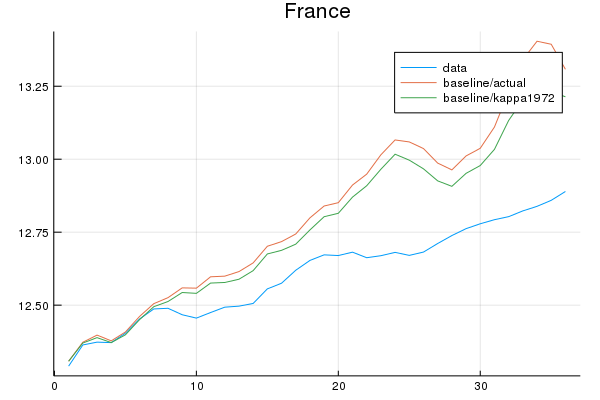

In [46]:
compare(["data", "baseline/actual", "baseline/kappa1972"], 9)

0.02564595397452325
0.060733793617174
0.04854124835180049


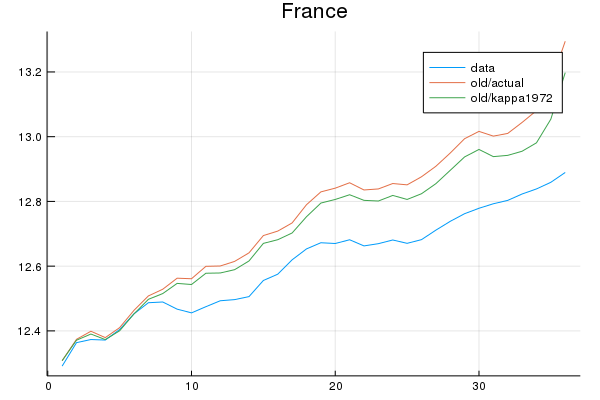

In [47]:
compare(["data", "old/actual", "old/kappa1972"], 9)

0.06723223408492926
0.1181736394402314
0.16768900056509783


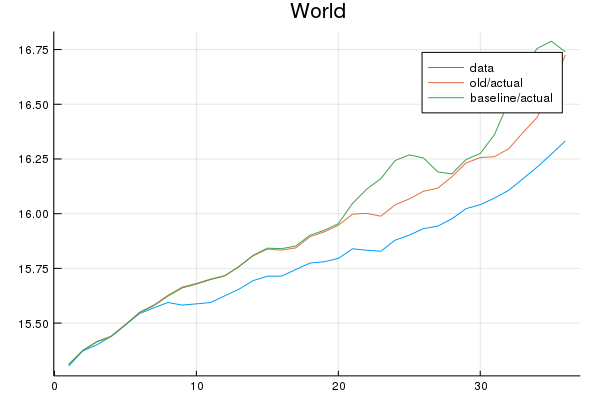

In [48]:
# whole world
compare(["data", "old/actual", "baseline/actual"], 0)

0.060733793617174
0.04854124835180049


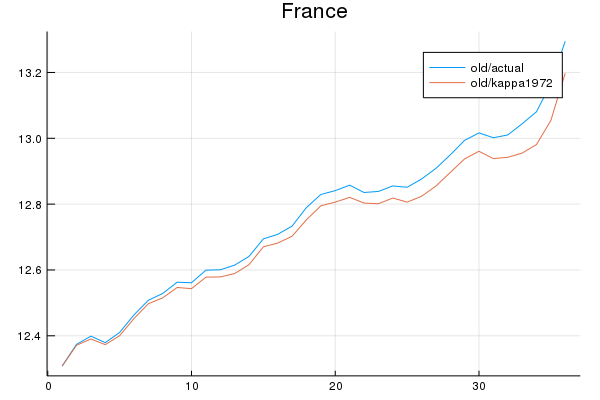

In [49]:
compare(["old/actual", "old/kappa1972"], 9)